In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [18]:
currenr_dir = Path.cwd()
path = currenr_dir / 'insurance.csv'
data = pd.read_csv(path)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
from sklearn import preprocessing

In [20]:
x = data[['age']].values
y = data[['charges']].values

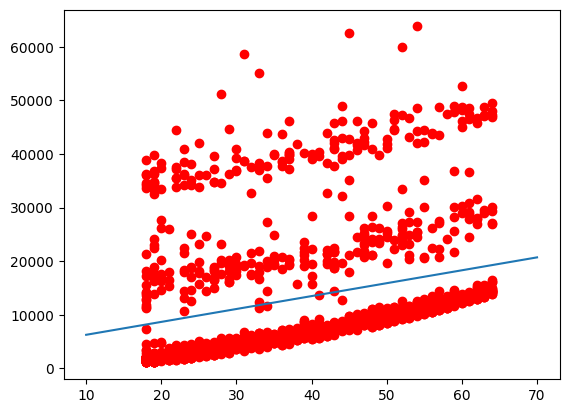

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.2)
from sklearn.linear_model import LinearRegression

one = np.ones((x_train.shape[0],1))
Xbar = np.concatenate((one, x_train), axis = 1)


regr = LinearRegression(fit_intercept=False)
regr.fit(Xbar,y_train)

plt.plot(x,y,'ro')
w_0 = regr.coef_[0][1]
w_1 = regr.coef_[0][0]
x_line = np.linspace(10,70,2)
y_line = x_line * w_0 + w_1
plt.plot(x_line,y_line)

In [22]:
ones = np.ones((x_test.shape[0],1))
Xbar2 = np.concatenate((ones, x_test), axis = 1)
y_predict = regr.predict(Xbar2)

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_predict,y_test)
r2

-11.092718618762202

In [24]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_predict,y_test)
mae

9173.258196746592

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_predict, y_test)
mse

135983957.48054686